In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### It seems there are a lot of outliers in the dataset

In [28]:
columns = list(df.columns)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

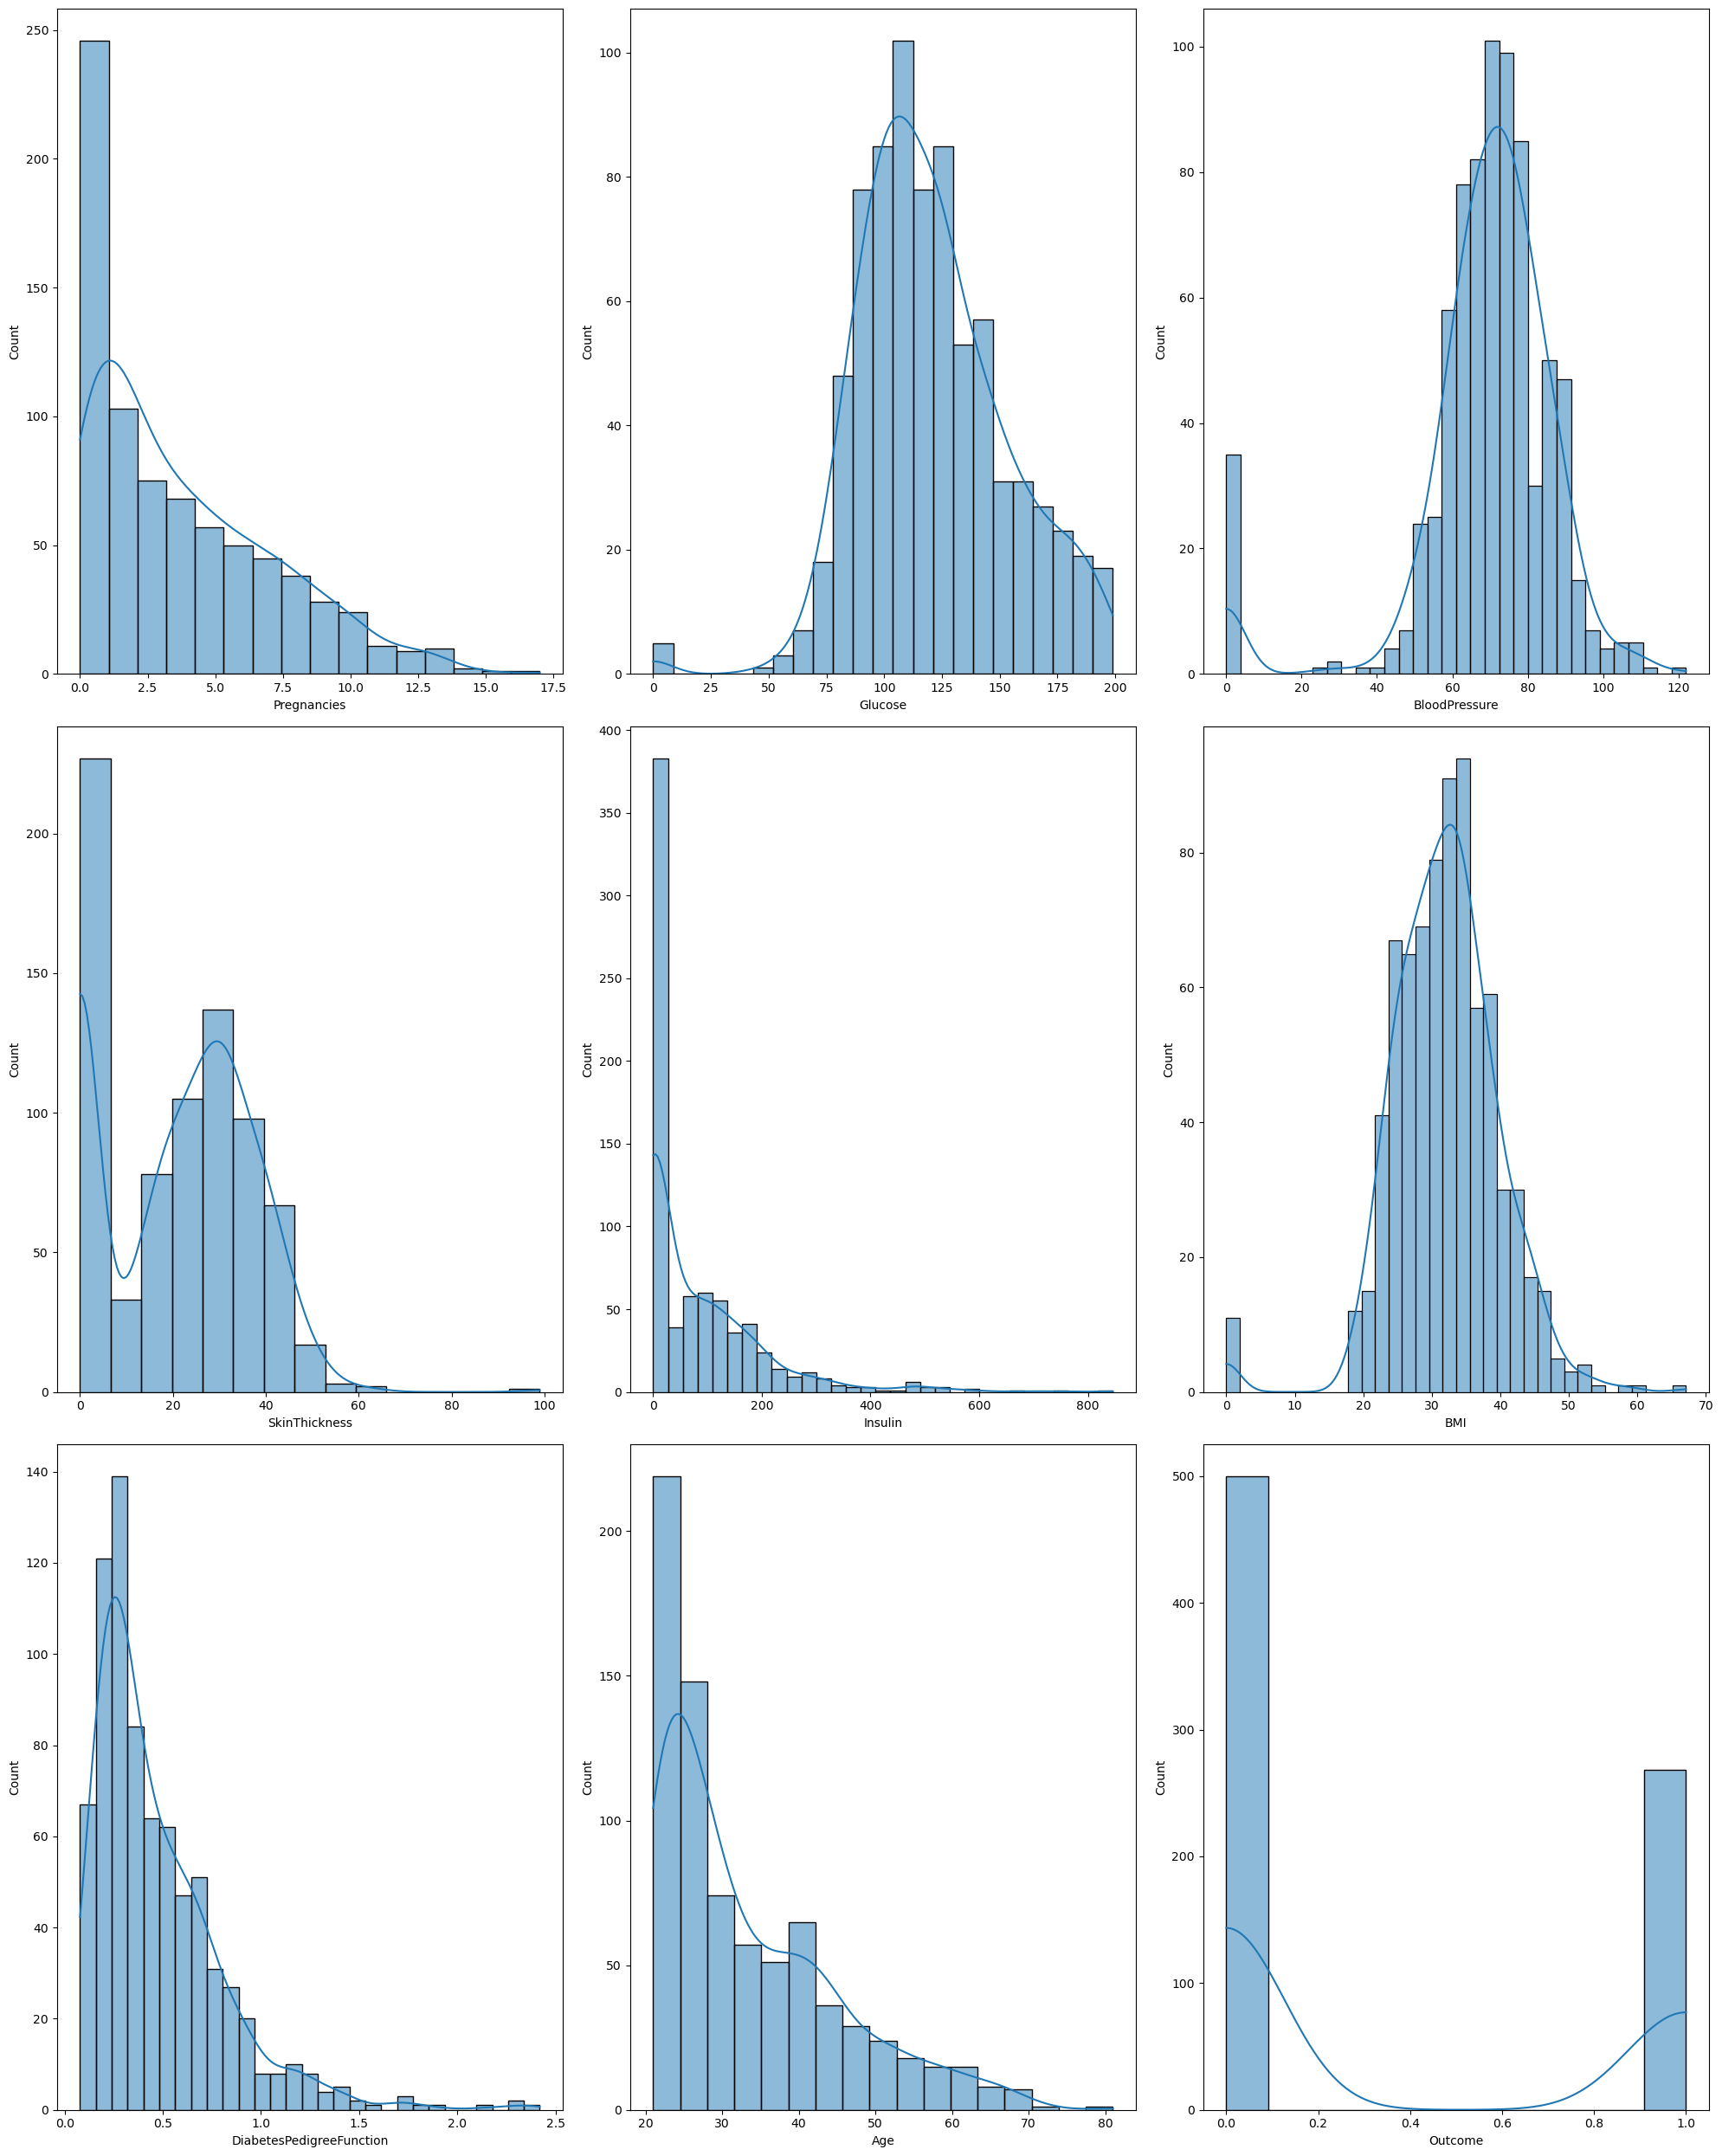

In [60]:
#Let's checkout the distribution of the data in every column
plt.figure(figsize=(20,25))
plot_number=1
for column in columns:
    ax = plt.subplot(3,3,plot_number)
    sns.histplot(df[column],kde=True,ax=ax)
    plt.xlabel(column)
    plot_number+=1
plt.tight_layout()
plt.show()

#### We can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [63]:
#replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(to_replace=0,value=df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(to_replace=0,value=df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(to_replace=0,value=df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(to_replace=0,value = df['SkinThickness'].mean())

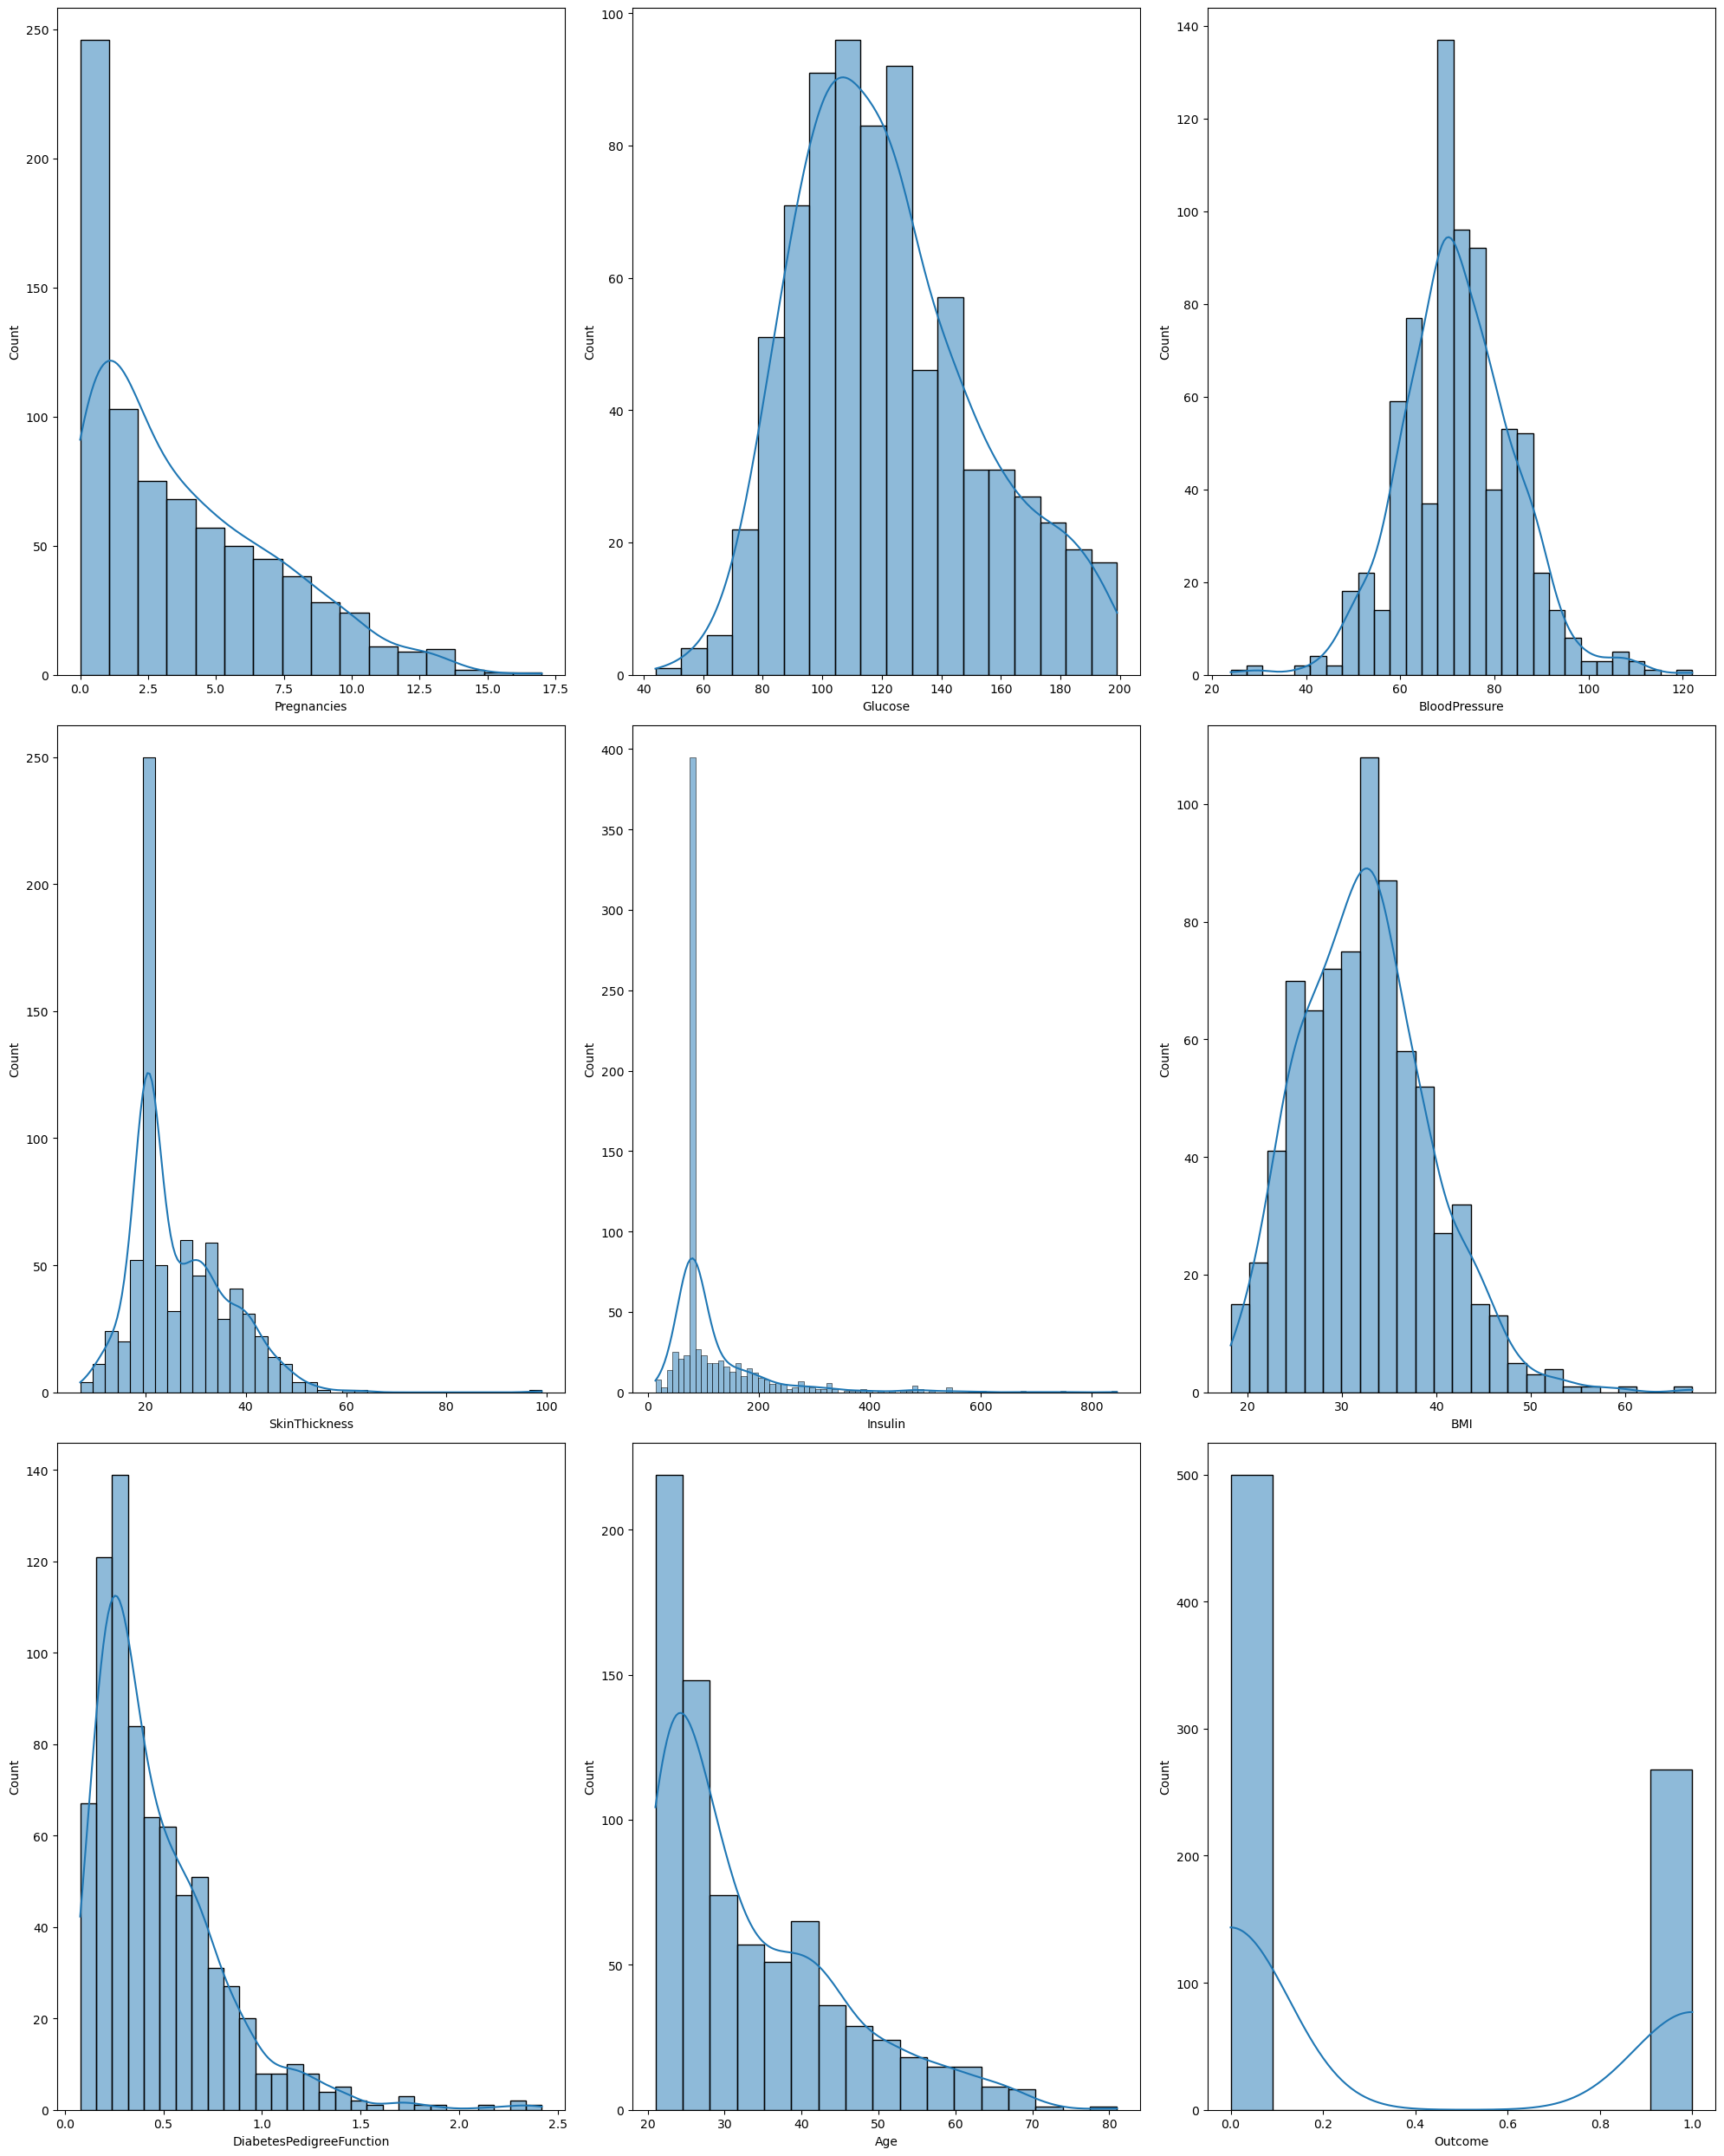

In [69]:
#We can now check the data distribution
plot_number=1
plt.figure(figsize=(20,25))
for column in columns:
    ax = plt.subplot(3,3,plot_number)
    sns.histplot(df[column],kde=True,ax=ax)
    plot_number+=1
plt.tight_layout()
plt.show()

- Now we have dealt with all the zero values

<Axes: >

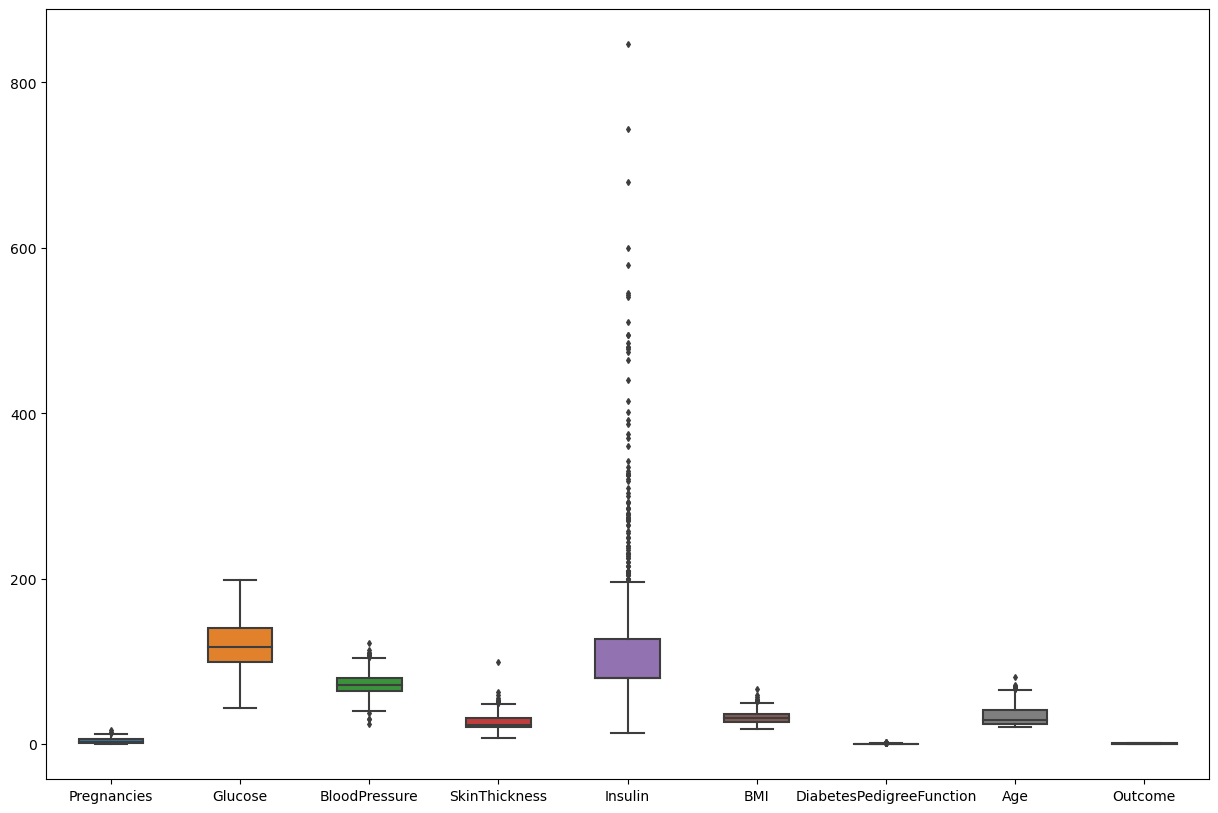

In [70]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width = 0.5,ax=ax,fliersize=3)

In [72]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
#Removing the top 2% data from the pregnancies column
q =df['Pregnancies'].quantile(0.98)
data_cleaned = df[df['Pregnancies']<q]
#Removing the top 1% data from the BMI column
q = df['BMI'].quantile(0.99)
data_cleaned = df[df['BMI']<q]
#Removing the top 1% data from the Skin Thickness column
q = df['SkinThickness'].quantile(0.99)
data_cleaned = df[df['SkinThickness']<q]
# we are removing the top 5% data from the Insulin column
q = df['Insulin'].quantile(0.95)
data_cleaned = df[df['Insulin']<q]
# we are removing the top 1% data from the DiabetesPedigreeFunction column
q = df['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = df[df['DiabetesPedigreeFunction']<q]
# we are removing the top 1% data from the Age column
q = df['Age'].quantile(0.99)
data_cleaned = df[df['Age']<q]

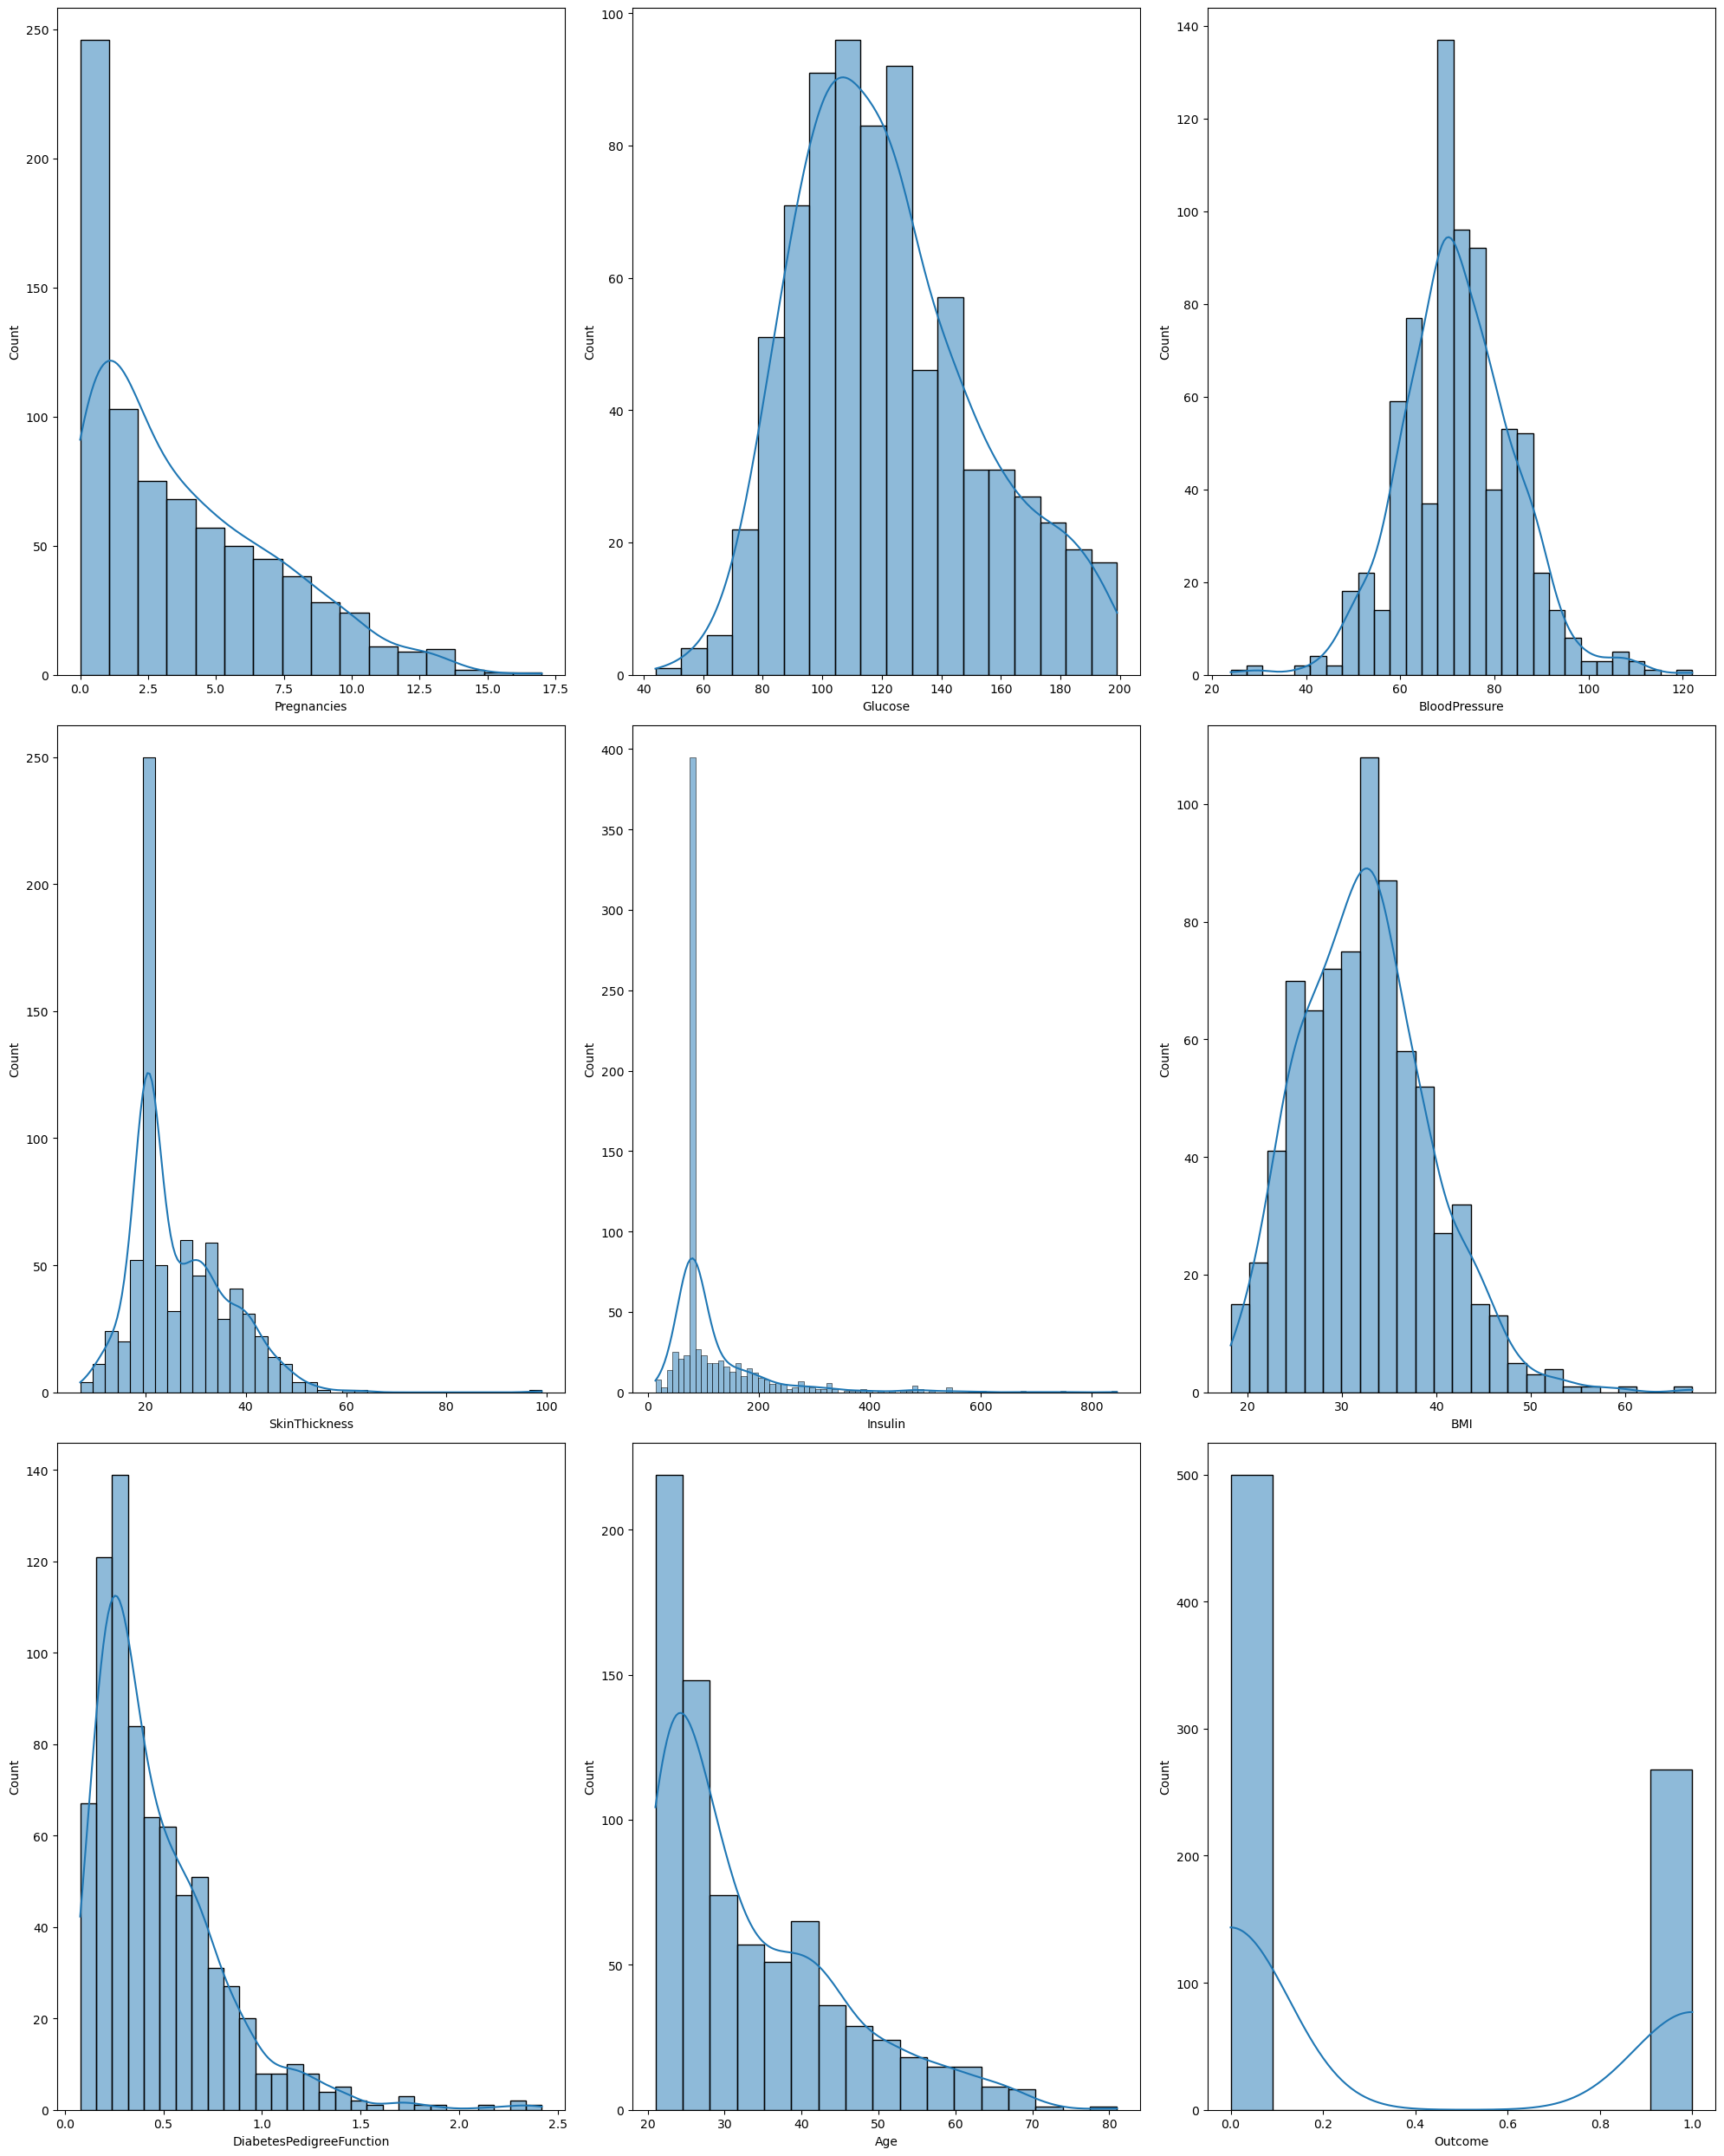

In [77]:
#We can now check the data distribution
plot_number=1
plt.figure(figsize=(20,25))
for column in columns:
    ax = plt.subplot(3,3,plot_number)
    sns.histplot(df[column],kde=True,ax=ax)
    plot_number+=1
plt.tight_layout()
plt.show()

- The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [78]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [79]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

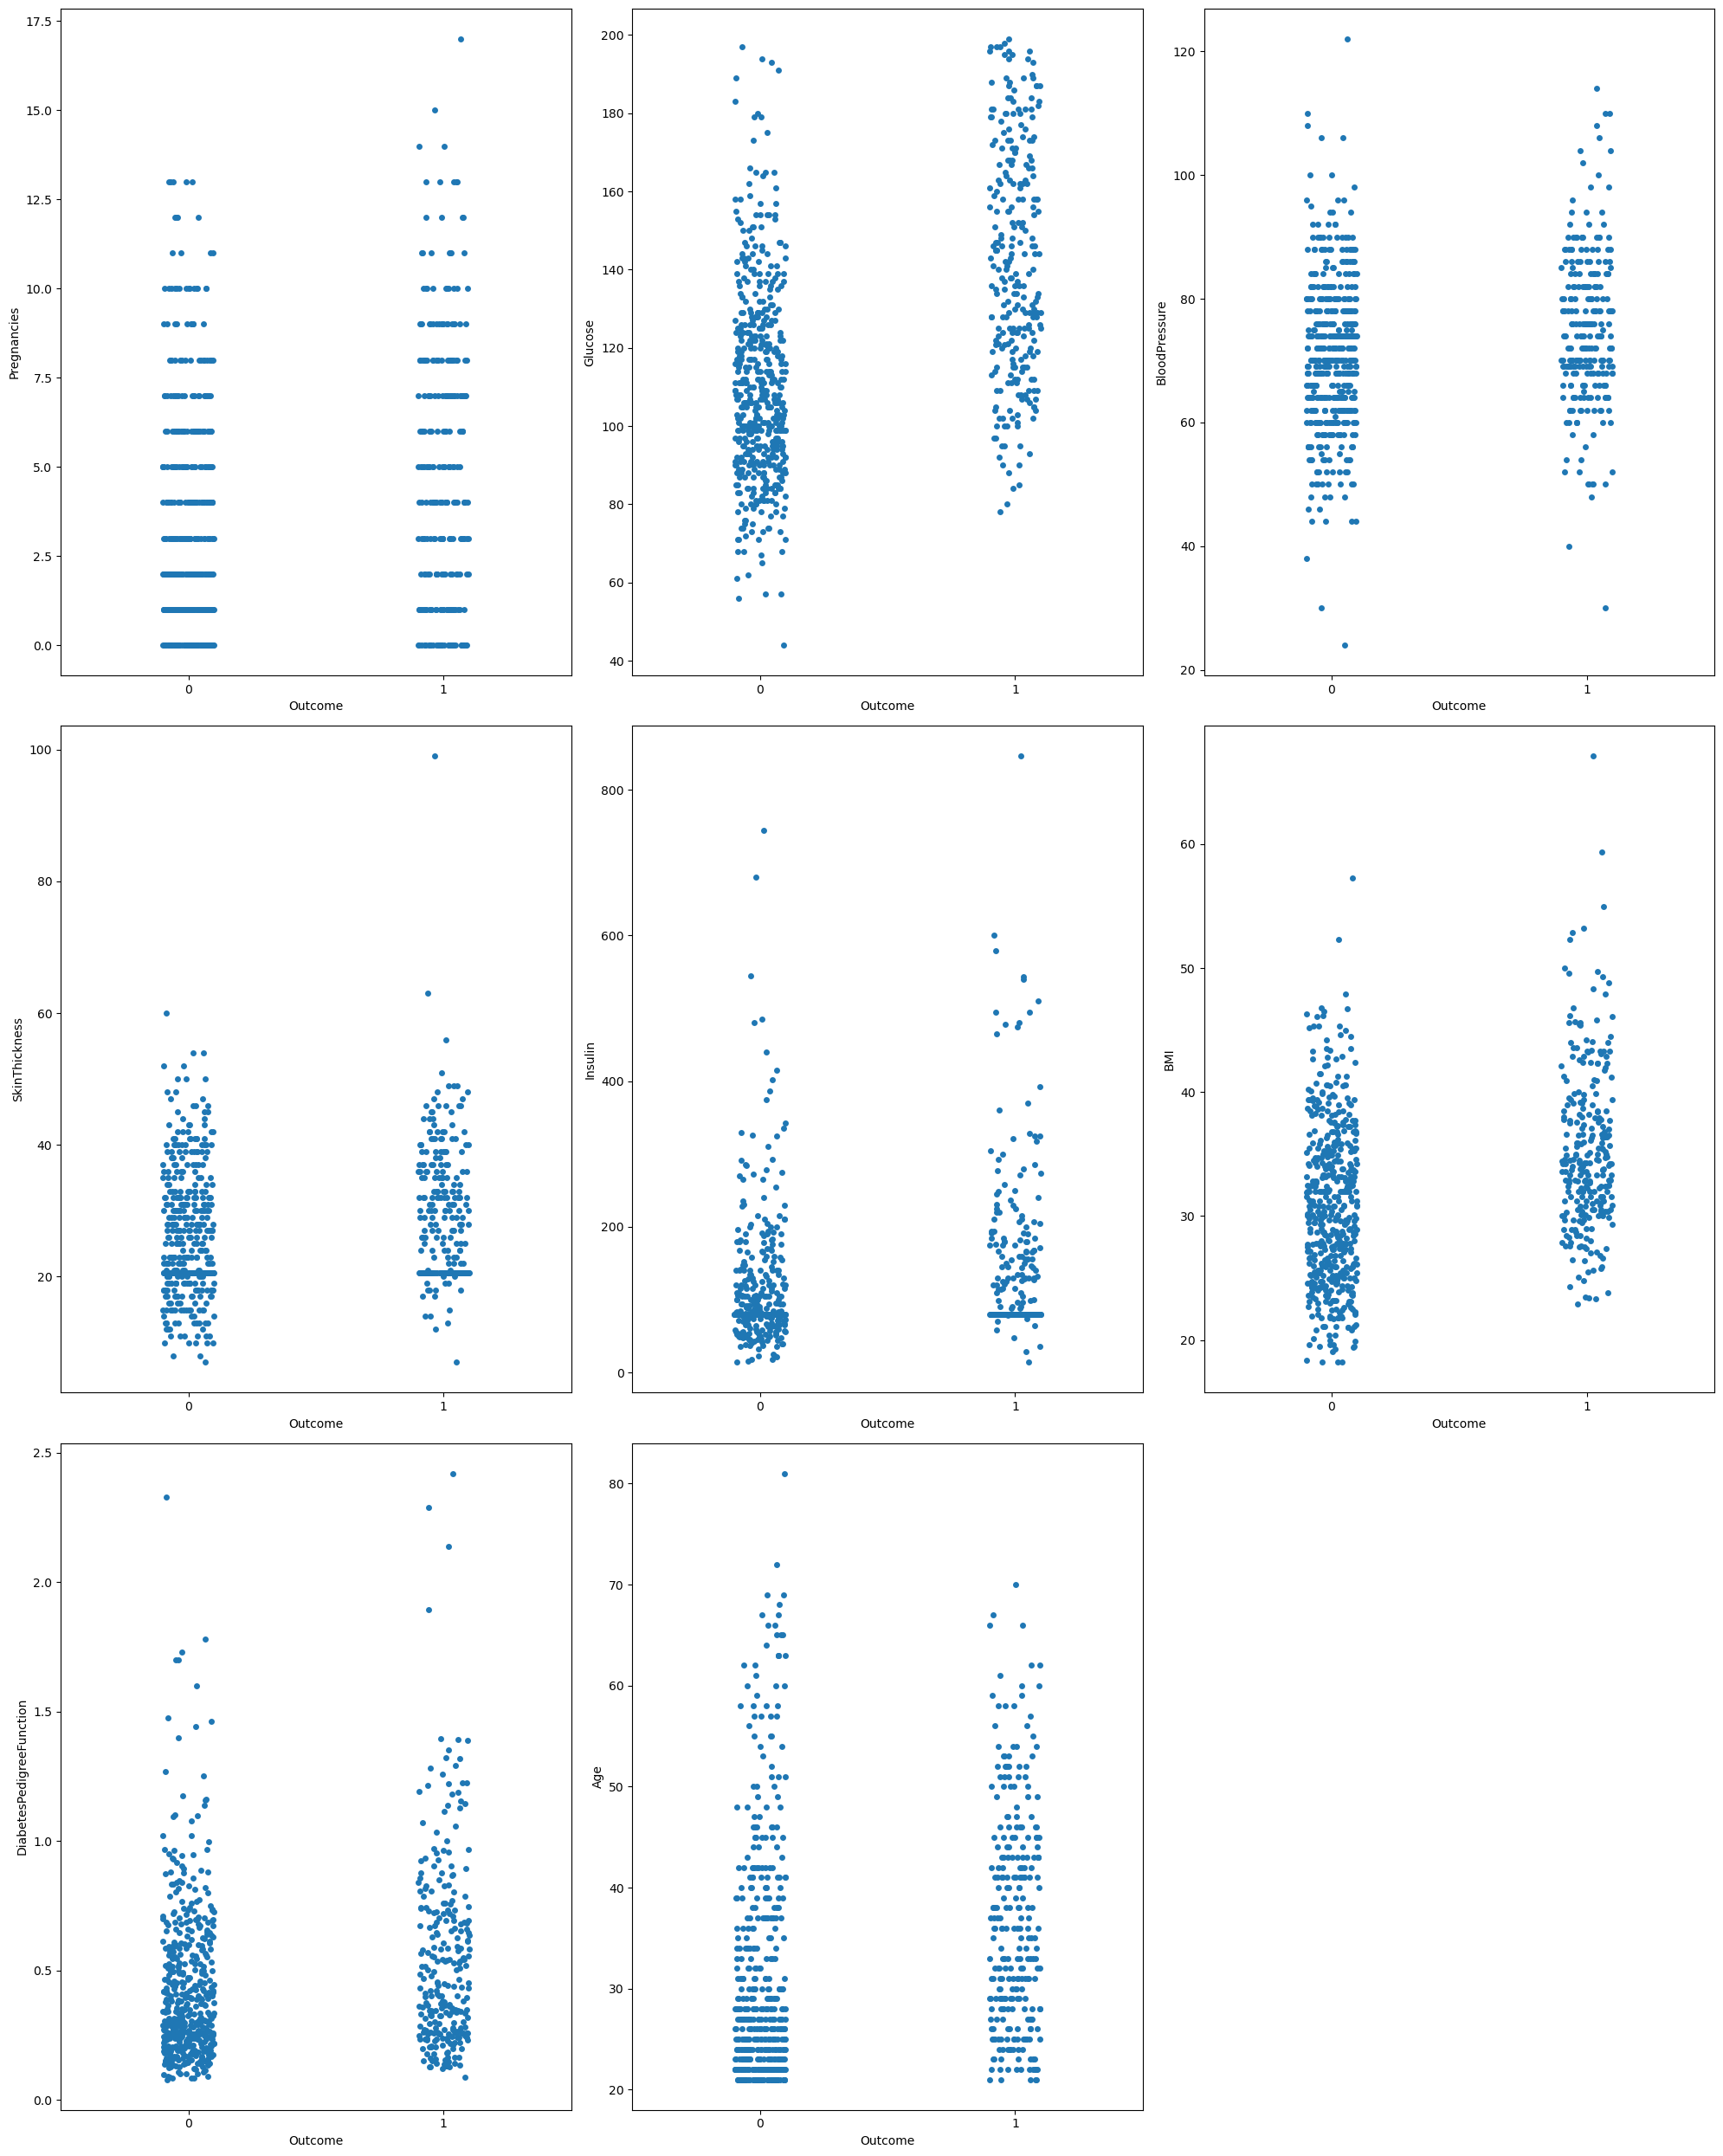

In [85]:
#We can now check how the data is distributed for every column with respect to the Outcome column
plt.figure(figsize=(20,25))
plot_number=1
for column in X.columns:
    ax = plt.subplot(3,3,plot_number)
    sns.stripplot(x = y,y = X[column],ax=ax)
    plot_number+=1
plt.tight_layout()
plt.show()

In [86]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [87]:
X

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [90]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [92]:
vif = pd.DataFrame()
vif['variables'] = [i for i in df.columns if i!='Outcome']

In [93]:
vif

,variables
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin
5,BMI
6,DiabetesPedigreeFunction
7,Age


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [101]:
vif

,variables,VIF
0,Pregnancies,1.431075
1,Glucose,1.347308
2,BloodPressure,1.247914
3,SkinThickness,1.450510
4,Insulin,1.262111
5,BMI,1.550227
6,DiabetesPedigreeFunction,1.058104
7,Age,1.605441


- Here we can see that all the values of VIF are below 5 and hence no multi-collinearity

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [104]:
import pickle
#Writing the model object to a pickle file
with open('log_model.pkl','wb') as file:
    pickle.dump(log_reg,file)

#loading the model object now
with open('log_model.pkl','rb') as file:
    log_reg_loaded = pickle.load(file)

In [105]:
log_reg_loaded 

LogisticRegression()

In [106]:
y_pred = log_reg_loaded.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.734375

In [107]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[99, 24],
       [27, 42]], dtype=int64)

In [108]:
true_pos = conf_mat[0][0]
false_pos = conf_mat[0][1]
false_neg = conf_mat[1][0]
true_neg = conf_mat[1][1]

In [109]:
#Breaking down the formula of accuracy
Accuracy = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
Accuracy

0.734375

In [110]:
#Precision
Precision = (true_pos)/(true_pos+false_pos)
Precision

0.8048780487804879

In [111]:
#Recall
Recall = (true_pos)/(true_pos+false_neg)
Recall

0.7857142857142857

In [112]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7951807228915663

In [113]:
#Area under the curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)

In [114]:
auc

0.7067868504772005

### ROC 

In [136]:
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_test,y_pred)

In [137]:
roc_curve(y_test,y_pred)

(array([0.        , 0.19512195, 1.        ]),
 array([0.        , 0.60869565, 1.        ]),
 array([2, 1, 0], dtype=int64))

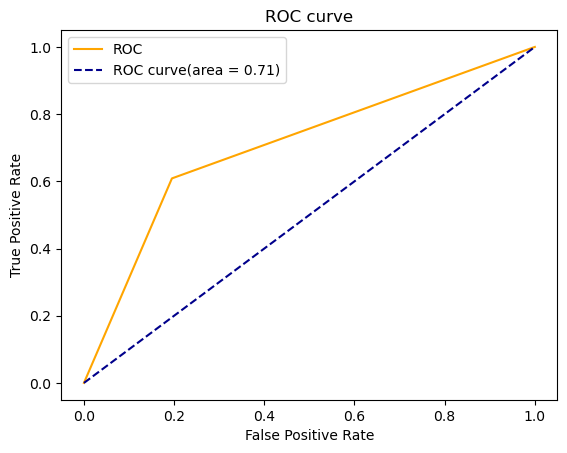

In [149]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [151]:
true_pos/(true_pos+false_neg)

0.7857142857142857

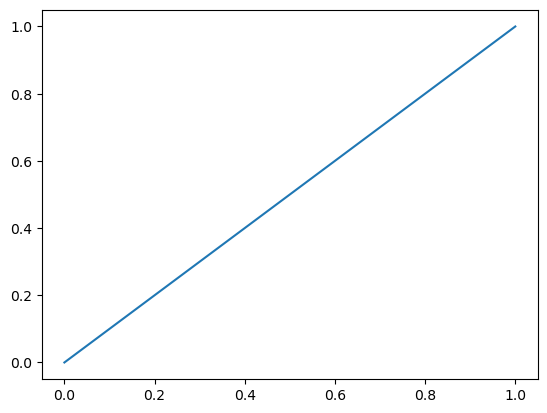

In [143]:
plt.plot([0,1],[0,1])